<a href="https://colab.research.google.com/github/PSamita/Construction-Injury/blob/main/Construction_Injury.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **General Setup**

## **Import Tools**

In [ ]:
pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Remove the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Set the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Statistical functions and distributions
import scipy.stats as stats

# Mutual information
from sklearn.feature_selection import mutual_info_regression

# Cluster data
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_score

# PCA
from sklearn.decomposition import PCA

# TruncatedSVD
from sklearn.decomposition import TruncatedSVD

# Encode categorical variables
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Tools to build prediction models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, BaggingClassifier, RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

# Tune the model
from sklearn.model_selection import GridSearchCV

# Check model performance
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error, confusion_matrix, classification_report, precision_recall_curve, recall_score
from sklearn import metrics, tree


## **Import Data**

In [ ]:
# Read in data
injury_data = pd.read_csv("/content/drive/MyDrive/BI/Year 2/Winter/APS490/Model/Injury Analysis.csv")

In [ ]:
# Copy data to another variable to avoid any changes to original data
copy_injury_data = injury_data.copy()

In [ ]:
# See data shape
injury_data.shape

(145900, 88)

In [ ]:
# Check data info
injury_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145900 entries, 0 to 145899
Data columns (total 88 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Small Business Indicator                          145900 non-null  object 
 1   Full Time Worker Band                             145900 non-null  object 
 2   Class Description                                 145900 non-null  object 
 3   Rate Group Code + Description                     145900 non-null  object 
 4   CU ID + Description                               145900 non-null  object 
 5   Industry Sector Code + Description                145900 non-null  object 
 6   Industry Sector Description                       145900 non-null  object 
 7   NAICS Description                                 72242 non-null   object 
 8   Accident Date                                     145900 non-null  object 
 9   Acci

## **Select Data**

In [ ]:
# Filter data to contain only CO-CONSTRUCTION
injury_data = injury_data.loc[injury_data['Industry Sector Code + Description'].str.contains('CO - CONSTRUCTION')]

## **Data Overview**

In [ ]:
# View the first 5 rows of the dataset
injury_data.head()

,Small Business Indicator,Full Time Worker Band,Class Description,Rate Group Code + Description,CU ID + Description,Industry Sector Code + Description,Industry Sector Description,NAICS Description,Accident Date,Accident Time,Status Description,Claim Type Description,Cost Category Description,Injury Disease Category Description,Cost Message Description,Fatality Indicator,Fatality Status Code,Fatality Claim Description,Number of Shared Cost Employers,HSA Entity ID + Name,Gender Code,Language Service Description,Accident Age,Language Spoken Description,Employment Date,Occupational Experience in Years,NOC Occupation Category Description,NOC Occupation Description,SOC Occupation Category Description,SOC Occupation Description,Smoking Status Description,Smoking Amount,CSA Accident Category Code + Description,CSA Accident Type Code + Description,CWIS Accident Category Description,CWIS Accident Type Description,Fatality Accident Type Description,Accident Place Code + Description,Accident Place Municipal Code + Name,Accident Place Municipal Code,Accident Place Municipal Name,CSA Accident Source Category Code + Description,CSA Source Injury Description,CWIS Source Category Description,CWIS Source Injury Description,CSA Source 2 Category Description,CSA Source 2 Injury Description,Causal Agent 1 Description,Causal Agent 2 Description,Causal Agent Exposure,Radiation Exposure,Diagnosis Latency,Noise Exposure Description,CSA Part of Body Category Code + Description,CSA Part of Body Code + Description,CWIS Part of Body Category Description,CWIS Part of Body Description,Critical Injury Indicator,CSA Nature of Injury Category Code + Description,CSA Nature of Injury Code + Description,CWIS Nature of Injury Category Description,CWIS Nature of Injury Description,Diagnostic Category 1 Code + Description,Diagnostic Category 2 Description,Cause Death 1 Code + Description,Cause Death 2 Description,Morphology Description,Accident Calendar Date,Accident Day of Week Name,Accident Day of Month Number,Accident Month Number,Accident Quarter,Accident Year,Allowed Year,Entitlement Year,Predominant Class,YTD Accident Cost,YTD Number of Days Lost,Age Category,Unnamed: 79,Unnamed: 80,Unnamed: 81,<20,20-29,30-39,40-49,50-59,>59
0,Y,LESS THAN 20,,412 - G2: INFRASTRUCTURE CONSTRUCTION ...,2371300 - POWER AND COMMUNICATION LINE AND REL...,CO - CONSTRUCTION,CONSTRUCTION,237130: POWER AND COMMUNICATION LINE AND RELAT...,13/1/2021,NaN,ALLOWED,NO LOST TIME,NO LOST-TIME BENEFIT COST,OTHER INJURY ...,...,N,,NOT APPLICABLE ...,1,IHSA - INFRASTRUCTURE HEALTH AND SAFETY ASSOCI...,M,ENGLISH,26.0,NOT APPLICABLE,NaN,NaN,NOT APPLICABLE ...,NOT APPLICABLE ...,NOT APPLICABLE ...,NOT APPLICABLE,,NaN,NA - NOT APPLICABLE ...,N/A - NOT APPLICABLE ...,NOT APPLICABLE ...,NOT APPLICABLE ...,NOT APPLICABLE,N/A - NOT APPLICABLE ...,N/A - NOT APPLICABLE ...,N/A,NOT APPLICABLE,N/A - NOT APPLICABLE ...,NOT APPLICABLE ...,NOT APPLICABLE ...,NOT APPLICABLE ...,NOT APPLICABLE ...,NOT APPLICABLE ...,NOT APPLICABLE,NOT APPLICABLE,0,0,0,NOT APPLICABLE ...,N/A - NOT APPLICABLE ...,N/A - NOT APPLICABLE ...,NOT APPLICABLE ...,NOT APPLICABLE ...,N,N/A - NOT APPLICABLE ...,N/A - NOT APPLICABLE ...,NOT APPLICABLE ...,NOT APPLICABLE ...,N/A - NOT APPLICABLE ...,NOT APPLICABLE ...,N/A - NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE ...,13/1/2021,Wednesday,13,1,1,2021,2021,2021,G2,119.79,0.0,20-29,NaN,NaN,NaN,19,20.0,30.0,40.0,50.0,60.0
1,Y,20 TO 100,,487 - G5: SPECIALTY TRADES CONSTRUCTION ...,2389100 - SITE PREPARATION CONTRACTORS ...,CO - CONSTRUCTION,CONSTRUCTION,238910: SITE PREPARATION CONTRACTORS ...,12/3/2020,NaN,ALLOWED,NO LOST TIME,NO LOST-TIME BENEFIT COST,OTHER INJURY ...,...,N,,NOT APPLICABLE ...,1,IHSA - INFRASTRUCTURE HEALTH AND SAFETY ASSOCI...,M,ENGLISH,23.0,NOT APPLICABLE,NaN,NaN,NOT APPLICABLE ...,NOT APPLICABLE ...,NOT APPLICABLE ...,NOT APPLICABLE,,NaN,NA - NOT APPLICABLE ...,N/A - NOT APPLICABLE ...,NOT APPLICABLE ...,NOT APPLICABLE ...,NOT APPLICABLE,N/A - NOT APPLICABLE ...,N/A - NOT

In [ ]:
# View the last 5 rows of the dataset
injury_data.tail()

,Small Business Indicator,Full Time Worker Band,Class Description,Rate Group Code + Description,CU ID + Description,Industry Sector Code + Description,Industry Sector Description,NAICS Description,Accident Date,Accident Time,Status Description,Claim Type Description,Cost Category Description,Injury Disease Category Description,Cost Message Description,Fatality Indicator,Fatality Status Code,Fatality Claim Description,Number of Shared Cost Employers,HSA Entity ID + Name,Gender Code,Language Service Description,Accident Age,Language Spoken Description,Employment Date,Occupational Experience in Years,NOC Occupation Category Description,NOC Occupation Description,SOC Occupation Category Description,SOC Occupation Description,Smoking Status Description,Smoking Amount,CSA Accident Category Code + Description,CSA Accident Type Code + Description,CWIS Accident Category Description,CWIS Accident Type Description,Fatality Accident Type Description,Accident Place Code + Description,Accident Place Municipal Code + Name,Accident Place Municipal Code,Accident Place Municipal Name,CSA Accident Source Category Code + Description,CSA Source Injury Description,CWIS Source Category Description,CWIS Source Injury Description,CSA Source 2 Category Description,CSA Source 2 Injury Description,Causal Agent 1 Description,Causal Agent 2 Description,Causal Agent Exposure,Radiation Exposure,Diagnosis Latency,Noise Exposure Description,CSA Part of Body Category Code + Description,CSA Part of Body Code + Description,CWIS Part of Body Category Description,CWIS Part of Body Description,Critical Injury Indicator,CSA Nature of Injury Category Code + Description,CSA Nature of Injury Code + Description,CWIS Nature of Injury Category Description,CWIS Nature of Injury Description,Diagnostic Category 1 Code + Description,Diagnostic Category 2 Description,Cause Death 1 Code + Description,Cause Death 2 Description,Morphology Description,Accident Calendar Date,Accident Day of Week Name,Accident Day of Month Number,Accident Month Number,Accident Quarter,Accident Year,Allowed Year,Entitlement Year,Predominant Class,YTD Accident Cost,YTD Number of Days Lost,Age Category,Unnamed: 79,Unnamed: 80,Unnamed: 81,<20,20-29,30-39,40-49,50-59,>59
145756,Y,20 TO 100,CONSTRUCTION,719 - INSIDE FINISHING ...,"4271099 - PLASTER, DRYWALL, AND ACOUSTICAL WOR...",CO - CONSTRUCTION,CONSTRUCTION,NaN,19/6/2019,1100.0,ALLOWED,LOST TIME,LOST-TIME BENEFIT COST,OTHER INJURY ...,...,N,,NOT APPLICABLE ...,1,IHSA - INFRASTRUCTURE HEALTH AND SAFETY ASSOCI...,M,FRENCH,65.0,ENGLISH,3/7/1995,24.0,MASONRY AND PLASTERING TRADES ...,"PLASTERERS, DRYWALL INSTALLERS AND FINISHERS, ...",NOT APPLICABLE ...,NOT APPLICABLE,,NaN,21 - BODILY REACTION ...,21502 - TRIPPING OVER SOMETHING-WITHOUT FALL ...,BODILY REACTION ...,FROM VOLUNTARY MOTIONS ...,NOT APPLICABLE,C - BUILDING UNDER CONSTRUCTION. ...,2628 - PELHAM ...,2628,PELHAM,"562 - BODILY MOTION OR POSITION OF INJURED, IL...","BODILY MOTION OR POSITION OF INJURED, ILL WORK...","BODILY MOTION (NO LIFTING, PULLING, PUSHING, E...",REPETITIVE MOTIONS ...,"PIPES, DUCTS, TUBING ...","PIPES, DUCTS, TUBING, UNS ...",NOT APPLICABLE,NOT APPLICABLE,0,0,0,...,"210 - SHOULDER, INCL. CLAV.,SCAP., AND TRAP. M...","21000 - SHOULDER, INCL. CLAV.,SCAP., AND TRAP....",TRUNK ...,SHOULDER(S) (INCLUDES CLAVICLE AND SCAPULA) ...,N,"021 - SPRAINS, STRAINS, TEARS ...","02100 - SPRAINS, STRAINS, TEARS UNSPEC. ...","SPRAINS, STRAINS ...","SPRAINS, STRAINS ...",N/A - NOT APPLICABLE ...,NOT APPLICABLE ...,N/A - NOT APPLICABLE,NOT APPLICABLE,NOT APPLICABLE ...,19/6/2019,Wednesday,19,6,2,2019,2019,2021,NaN,62918.29,0.0,>59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145757,Y,20 TO 100,CONSTRUCTION,707 - MECHANICAL AND SHEET METAL WORK ...,"4241099 - PLUMBING, HEATING, AND AIR CONDITION...",CO - CONSTRUCTION,CONSTRUCTION,NaN,8/8/2019,1030.0,ALLOWED,LOST TIME,LOST-TIME BENEFIT COST,OTHER INJURY ...,...,N,,NOT APPLICABLE ...,1,IHSA - INFRASTRUCTURE HEALTH AND SAFETY ASSOCI...,M,ENGLISH,41.0,ENGLISH,7

In [ ]:
# See data shape
injury_data.shape

(84666, 88)

In [ ]:
# Check data info
injury_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84666 entries, 0 to 145760
Data columns (total 88 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Small Business Indicator                          84666 non-null  object 
 1   Full Time Worker Band                             84666 non-null  object 
 2   Class Description                                 84666 non-null  object 
 3   Rate Group Code + Description                     84666 non-null  object 
 4   CU ID + Description                               84666 non-null  object 
 5   Industry Sector Code + Description                84666 non-null  object 
 6   Industry Sector Description                       84666 non-null  object 
 7   NAICS Description                                 45327 non-null  object 
 8   Accident Date                                     84666 non-null  object 
 9   Accident Time   

In [ ]:
# Correct data type

# Convert Accident Time column to object
injury_data['Accident Time'] = injury_data['Accident Time'].apply(str)

# Convert Accident Day of Month Number column to object
injury_data['Accident Day of Month Number'] = injury_data['Accident Day of Month Number'].apply(str)

# Convert Accident Quarter column to object
injury_data['Accident Quarter'] = injury_data['Accident Quarter'].apply(str)

# Convert Accident Year column to object
injury_data['Accident Year'] = injury_data['Accident Year'].apply(str)

# Convert Allowed Year column to object
injury_data['Allowed Year'] = injury_data['Allowed Year'].apply(str)

# Convert Entitlement Year column to object
injury_data['Entitlement Year'] = injury_data['Entitlement Year'].apply(str)

In [ ]:
# Check data info
injury_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84666 entries, 0 to 145760
Data columns (total 88 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Small Business Indicator                          84666 non-null  object 
 1   Full Time Worker Band                             84666 non-null  object 
 2   Class Description                                 84666 non-null  object 
 3   Rate Group Code + Description                     84666 non-null  object 
 4   CU ID + Description                               84666 non-null  object 
 5   Industry Sector Code + Description                84666 non-null  object 
 6   Industry Sector Description                       84666 non-null  object 
 7   NAICS Description                                 45327 non-null  object 
 8   Accident Date                                     84666 non-null  object 
 9   Accident Time   

In [ ]:
# See number of null values in each column
injury_data.isnull().sum()

Small Business Indicator                                0
Full Time Worker Band                                   0
Class Description                                       0
Rate Group Code + Description                           0
CU ID + Description                                     0
Industry Sector Code + Description                      0
Industry Sector Description                             0
NAICS Description                                   39339
Accident Date                                           0
Accident Time                                           0
Status Description                                      0
Claim Type Description                                  0
Cost Category Description                               0
Injury Disease Category Description                     0
Cost Message Description                                0
Fatality Indicator                                      0
Fatality Status Code                                    0
Fatality Claim

In [ ]:
# Check unique values in each column
injury_data.nunique()

Small Business Indicator                                2
Full Time Worker Band                                   4
Class Description                                       3
Rate Group Code + Description                          25
CU ID + Description                                   123
Industry Sector Code + Description                      1
Industry Sector Description                             1
NAICS Description                                      41
Accident Date                                        1801
Accident Time                                         516
Status Description                                      4
Claim Type Description                                  2
Cost Category Description                               3
Injury Disease Category Description                     6
Cost Message Description                                8
Fatality Indicator                                      2
Fatality Status Code                                    5
Fatality Claim

In [ ]:
# List of all categorical variables
categorical_column = injury_data.select_dtypes(include = ["object", "category"]).columns.tolist()

# Print the chance of occurrences for each unique value in each categorical variable
for column in categorical_column:
  print(injury_data[column].value_counts(1))
  print("-" * 50)

Y    0.879727
N    0.120273
Name: Small Business Indicator, dtype: float64
--------------------------------------------------
GREATER THAN 100                  0.365838
LESS THAN 20                      0.325632
20 TO 100                         0.308176
UNKNOWN                           0.000354
Name: Full Time Worker Band, dtype: float64
--------------------------------------------------
                                  0.535362
CONSTRUCTION                      0.464330
PRE 1993 CLASSIFICATION SCHEME    0.000307
Name: Class Description, dtype: float64
--------------------------------------------------
465 - G4: BUILDING EQUIPMENT CONSTRUCTION                             0.171214
437 - G3: FOUNDATION, STRUCTURE AND BUILDING EXTERIOR CONSTRUCTION    0.138308
487 - G5: SPECIALTY TRADES CONSTRUCTION                               0.088713
412 - G2: INFRASTRUCTURE CONSTRUCTION                                 0.077835
707 - MECHANICAL AND SHEET METAL WORK                                 0

# **Feature Engineering**

## **Clean Data**

In [ ]:
# Drop some columns using domain knowledge
injury_data = injury_data.drop(['Class Description', 'CU ID + Description', 'Industry Sector Code + Description', 
                                'Industry Sector Description', 'Accident Date', 'Fatality Status Code', 
                                'Fatality Claim Description', 'HSA Entity ID + Name', 'Language Service Description', 
                                'NOC Occupation Category Description', 'NOC Occupation Description', 'SOC Occupation Category Description', 
                                'SOC Occupation Description', 'Smoking Status Description', 'CSA Accident Category Code + Description', 
                                'CSA Accident Type Code + Description', 'Fatality Accident Type Description', 'Accident Place Municipal Code + Name', 
                                'Accident Place Municipal Code', 'CSA Accident Source Category Code + Description', 'CSA Source Injury Description', 
                                'CSA Source 2 Category Description', 'CSA Source 2 Injury Description', 'Causal Agent 1 Description', 
                                'Causal Agent 2 Description', 'Causal Agent Exposure', 'Radiation Exposure', 'Diagnosis Latency', 
                                'Noise Exposure Description', 'CSA Part of Body Category Code + Description', 'CSA Part of Body Code + Description', 
                                'CSA Nature of Injury Category Code + Description', 'CSA Nature of Injury Code + Description', 
                                'Diagnostic Category 1 Code + Description', 'Diagnostic Category 2 Description', 'Cause Death 1 Code + Description', 
                                'Cause Death 2 Description', 'Morphology Description', 'Accident Calendar Date', 'Allowed Year', 'Accident Year', 
                                'Accident Month Number', 'Accident Day of Month Number', 'Accident Day of Week Name', 'CWIS Nature of Injury Description', 
                                'CWIS Part of Body Description', 'CWIS Source Injury Description', 'CWIS Accident Type Description', 'Rate Group Code + Description', 
                                'Status Description', 'Cost Category Description', 'Injury Disease Category Description', 'Cost Message Description', 
                                'Number of Shared Cost Employers', 'Language Spoken Description', 'Accident Place Code + Description', 'NAICS Description', 'Accident Time', 'Employment Date', 'Smoking Amount', 'Entitlement Year', 'Age Category', 'Smoking Amount', 
                                'Unnamed: 79', 'Unnamed: 80', 'Unnamed: 81', '<20', '20-29', '30-39', '40-49', '50-59', '>59'], axis = 1)

KeyError: ignored

In [ ]:
# See number of null values in each column
injury_data.isnull().sum()

Small Business Indicator                          0
Full Time Worker Band                             0
Claim Type Description                            0
Fatality Indicator                                0
Gender Code                                       0
Accident Age                                     65
Occupational Experience in Years              60397
CWIS Accident Category Description                0
Accident Place Municipal Name                     0
CWIS Source Category Description                  0
CWIS Part of Body Category Description            0
Critical Injury Indicator                         0
CWIS Nature of Injury Category Description        0
Accident Quarter                                  0
Predominant Class                             42571
YTD Accident Cost                                 0
YTD Number of Days Lost                           0
dtype: int64

In [ ]:
# Select columns with object dtype
obj_cols = injury_data.select_dtypes(include=["object", "category"]).columns.tolist()

# Convert obj_cols to a DataFrame
obj_cols_df = injury_data[obj_cols]

# Count 'NOT APPLICABLE' in each column
na_counts = obj_cols_df.apply(lambda x: x.str.lower().str.strip().eq('not applicable').sum())

# See number of 'NOT APPLICABLE'
print(na_counts)

Small Business Indicator                          0
Full Time Worker Band                             0
Claim Type Description                            0
Fatality Indicator                                0
Gender Code                                       0
CWIS Accident Category Description            49816
Accident Place Municipal Name                 44076
CWIS Source Category Description              49816
CWIS Part of Body Category Description        49007
Critical Injury Indicator                         0
CWIS Nature of Injury Category Description    49007
Accident Quarter                                  0
Predominant Class                                 0
dtype: int64


In [ ]:
# Replace 'NOT APPLICABLE' with NaN
injury_data = injury_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

injury_data.replace('NOT APPLICABLE', np.nan, inplace=True)

In [ ]:
# Select columns with object dtype
obj_cols = injury_data.select_dtypes(include=["object", "category"]).columns.tolist()

# Convert obj_cols to a DataFrame
obj_cols_df = injury_data[obj_cols]

# Count 'NOT APPLICABLE' in each column
na_counts = obj_cols_df.apply(lambda x: x.str.lower().str.strip().eq('not applicable').sum())

# See number of 'NOT APPLICABLE'
print(na_counts)

Small Business Indicator                      0
Full Time Worker Band                         0
Claim Type Description                        0
Fatality Indicator                            0
Gender Code                                   0
CWIS Accident Category Description            0
Accident Place Municipal Name                 0
CWIS Source Category Description              0
CWIS Part of Body Category Description        0
Critical Injury Indicator                     0
CWIS Nature of Injury Category Description    0
Accident Quarter                              0
Predominant Class                             0
dtype: int64


In [ ]:
# See number of null values in each column
injury_data.isnull().sum()

Small Business Indicator                          0
Full Time Worker Band                             0
Claim Type Description                            0
Fatality Indicator                                0
Gender Code                                       0
Accident Age                                     65
Occupational Experience in Years              60397
CWIS Accident Category Description            49816
Accident Place Municipal Name                 44076
CWIS Source Category Description              49816
CWIS Part of Body Category Description        49007
Critical Injury Indicator                         0
CWIS Nature of Injury Category Description    49007
Accident Quarter                                  0
Predominant Class                             42571
YTD Accident Cost                                 0
YTD Number of Days Lost                           0
dtype: int64

In [ ]:
# Impute missing values with mode
injury_data['Predominant Class'] = injury_data['Predominant Class'].fillna(injury_data['Predominant Class'].mode()[0])

In [ ]:
# Impute missing values with median
accident_age_median = injury_data['Accident Age'].median()
injury_data['Accident Age'].fillna(value = accident_age_median, inplace=True)

critical_injury_indicator_median = injury_data['Occupational Experience in Years'].median()
injury_data['Occupational Experience in Years'].fillna(value = critical_injury_indicator_median, inplace=True)

In [ ]:
# See number of null values in each column
injury_data.isnull().sum()

Small Business Indicator                          0
Full Time Worker Band                             0
Claim Type Description                            0
Fatality Indicator                                0
Gender Code                                       0
Accident Age                                      0
Occupational Experience in Years                  0
CWIS Accident Category Description            49816
Accident Place Municipal Name                 44076
CWIS Source Category Description              49816
CWIS Part of Body Category Description        49007
Critical Injury Indicator                         0
CWIS Nature of Injury Category Description    49007
Accident Quarter                                  0
Predominant Class                                 0
YTD Accident Cost                                 0
YTD Number of Days Lost                           0
dtype: int64

In [ ]:
# See the percentage of sub categories of each category to see if 'NOT APPLICABLE' are still present in the dataset
cat_cols = injury_data.select_dtypes(include='object').columns.tolist()

for i in cat_cols:
  print(injury_data[i].value_counts(normalize = True))
  print('*'*40)

Y    0.879727
N    0.120273
Name: Small Business Indicator, dtype: float64
****************************************
GREATER THAN 100    0.365838
LESS THAN 20        0.325632
20 TO 100           0.308176
UNKNOWN             0.000354
Name: Full Time Worker Band, dtype: float64
****************************************
NO LOST TIME    0.587402
LOST TIME       0.412598
Name: Claim Type Description, dtype: float64
****************************************
N    0.996799
Y    0.003201
Name: Fatality Indicator, dtype: float64
****************************************
M    0.964567
F    0.033272
?    0.002161
Name: Gender Code, dtype: float64
****************************************
BODILY REACTION                                                 0.187489
STRUCK BY                                                       0.178307
FALL FROM ELEVATION                                             0.160488
OVEREXERTION                                                    0.146428
FALL ON SAME LEVEL          

In [ ]:
# Replace 'UNKNOWN' with NaN
injury_data = injury_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

injury_data.replace('UNKNOWN', np.nan, inplace=True)

In [ ]:
# Replace '?' with NaN
injury_data = injury_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

injury_data.replace('?', np.nan, inplace=True)

In [ ]:
# Drop all rows with null value
injury_data = injury_data.dropna()

In [ ]:
# See number of null values in each column
injury_data.isnull().sum()

Small Business Indicator                      0
Full Time Worker Band                         0
Claim Type Description                        0
Fatality Indicator                            0
Gender Code                                   0
Accident Age                                  0
Occupational Experience in Years              0
CWIS Accident Category Description            0
Accident Place Municipal Name                 0
CWIS Source Category Description              0
CWIS Part of Body Category Description        0
Critical Injury Indicator                     0
CWIS Nature of Injury Category Description    0
Accident Quarter                              0
Predominant Class                             0
YTD Accident Cost                             0
YTD Number of Days Lost                       0
dtype: int64

In [ ]:
# See the percentage of sub categories of each category to see if 'NOT APPLICABLE' are still present in the dataset
cat_cols = injury_data.select_dtypes(include='object').columns.tolist()

for i in cat_cols:
  print(injury_data[i].value_counts(normalize = True))
  print('*'*40)

Y    0.917794
N    0.082206
Name: Small Business Indicator, dtype: float64
****************************************
LESS THAN 20        0.481437
20 TO 100           0.285928
GREATER THAN 100    0.232636
Name: Full Time Worker Band, dtype: float64
****************************************
LOST TIME       0.977403
NO LOST TIME    0.022597
Name: Claim Type Description, dtype: float64
****************************************
N    0.992247
Y    0.007753
Name: Fatality Indicator, dtype: float64
****************************************
M    0.963046
F    0.036954
Name: Gender Code, dtype: float64
****************************************
BODILY REACTION                                                 0.187527
STRUCK BY                                                       0.178339
FALL FROM ELEVATION                                             0.160422
OVEREXERTION                                                    0.146438
FALL ON SAME LEVEL                                              0.10873

## **Regroup Features**




In [ ]:
# Group Accident Place Municipal Name into two groups; GTA and outside of GTA
# Create a list containing all municipalities in GTA
gta_municipalities = ['AJAX', 'AURORA', 'BRAMPTON', 'BROCK', 'BURLINGTON', 'CALEDON', 'CLARINGTON', 'EAST GWILLIMBURY', 'GEORGINA', 'HALTON HILLS', 
                      'KING', 'MARKHAM', 'MILTON', 'MISSISSAUGA', 'NEWMARKET', 'OAKVILLE', 'OSHAWA', 'PICKERING', 'RICHMOND HILL', 'SCUGOG', 'TORONTO', 
                      'UXBRIDGE', 'VAUGHAN', 'WHITBY', 'WHITCHURCH-STOUFFVILLE']

# Create a new column
injury_data['Municipality'] = 'Outside of GTA'

# Iterate over the rows in the dataframe and update the 'Location' column to 'GTA' if the municipality is in the GTA
for i, row in injury_data.iterrows():
    if row['Accident Place Municipal Name'] in gta_municipalities:
        injury_data.at[i, 'Municipality'] = 'GTA'

# Drop accident_place_municipal_name
injury_data = injury_data.drop(['Accident Place Municipal Name'], axis=1)

In [ ]:
# Group CWIS Accident Category Description so that it has less subcategories
# Define dictionary to map subcategories to new categories
category_map = {
    'BODILY REACTION': 'Overexertion/Reaction',
    'STRUCK BY': 'Struck By/Against',
    'FALL FROM ELEVATION': 'Falls',
    'OVEREXERTION': 'Overexertion/Reaction',
    'FALL ON SAME LEVEL': 'Falls',
    'STRUCK AGAINST': 'Struck By/Against',
    'CONTACT WITH RADIATIONS, CAUSTICS, TOXIC AND NOXIOUS SUBSTAN': 'Other',
    'CAUGHT IN, UNDER OR BETWEEN': 'Other',
    'RUBBED OR ABRADED': 'Other',
    'MOTOR-VEHICLE ACCIDENTS': 'Other',
    'CONTACT WITH TEMPERATURE EXTREMES': 'Other',
    'TYPE OF ACCIDENT, NEC': 'Other',
    'NONHIGHWAY MOTOR VEHICLE ACCIDENTS': 'Other',
    'CONTACT WITH ELECTRIC CURRENT': 'Other',
    'EXPLOSIONS': 'Other',
    'NOISE': 'Other',
    'PUBLIC TRANSPORTATION ACCIDENTS': 'Other',
    'UNKNOWN TYPE OF ACCIDENT': 'Other',
    'PENDING TYPE OF ACCIDENT': 'Other'
}

# Apply the mapping to create a new column with the updated categories
injury_data['CWIS Accident Category'] = injury_data['CWIS Accident Category Description'].map(category_map)

# Drop the original column
injury_data.drop('CWIS Accident Category Description', axis=1, inplace=True)

In [ ]:
# Group CWIS Source Category Description
# Define the regrouping function
def regroup_category(category):
    if 'WORKING SURFACES' in category or 'BODILY MOTION' in category or 'LADDERS' in category or 'CLOTHING, APPAREL, SHOES' in category:
        return 'Human Factors'
    elif 'HAND TOOLS' in category or 'POWERED' in category or 'MACHINES' in category or 'VEHICLES' in category or 'HOISTING APPARATUS' in category or 'HEATING EQUIPMENT' in category or 'CONVEYORS' in category or 'PUMPS AND PRIME MOVERS' in category or 'RADIATING SUBSTANCES AND EQUIPMENT' in category or 'EXPLOSIVES' in category:
        return 'Tools and Equipment'
    elif 'METAL ITEMS' in category or 'WOOD ITEMS' in category or 'BOXES' in category or 'BARRELS' in category or 'CONTAINERS' in category or 'PACKAGES' in category or 'CONCRETE ITEMS' in category or 'CHEMICALS' in category or 'COMPOUNDS' in category or 'MINERAL ITEMS' in category or 'NONMETALLIC' in category:
        return 'Materials'
    elif 'HEAT' in category or 'COLD' in category or 'AIR PRESSURE' in category or 'FLAME' in category or 'FIRE' in category or 'SMOKE' in category or 'NOISE' in category or 'SILICA' in category or 'ASBESTOS' in category or 'NATURAL PHENOMENON' in category or 'DISASTERS' in category:
        return 'Environmental Factors'
    else:
        return 'Miscellaneous'

# apply the regrouping function to the 'CWIS Source Category Description' column
injury_data['CWIS Source Category'] = injury_data['CWIS Source Category Description'].apply(regroup_category)

# Drop the original column
injury_data.drop('CWIS Source Category Description', axis=1, inplace=True)

In [ ]:
# Group CWIS Part of Body Category Description
# Create a dictionary to map the original categories to the new categories
part_of_body_map = {
    'TRUNK': 'Lower Body',
    'LOWER EXTREMITIES': 'Lower Body',
    'UPPER EXTREMITIES': 'Upper Body',
    'HEAD': 'Upper Body',
    'MULTIPLE PARTS OF BODY': 'Multiple Body Parts',
    'BODY SYSTEMS': 'Multiple Body Parts',
    'PENDING PART OF BODY': 'Other',
    'UNKNOWN PART OF BODY': 'Other',
    'PART OF BODY, UNSPECIFIED': 'Other',
    'NECK (INCL NECK MUSCLES, EXCL CERVICAL VERTEBRAE)': 'Other'
}

# Use the map to replace the original categories with the new categories
injury_data['CWIS Part of Body Category'] = injury_data['CWIS Part of Body Category Description'].map(part_of_body_map)

# Drop the original column
injury_data.drop('CWIS Part of Body Category Description', axis=1, inplace=True)

In [ ]:
# Group CWIS Nature of Injury Category Description
# Define a dictionary to map the old categories to the new ones
injury_map = {'SPRAINS, STRAINS': 'Soft Tissue Injuries',
           'CONTUSIONS, CRUSHING, BRUISES - INTACT SKIN SURFACE': 'Soft Tissue Injuries',
           'INFLAMMATION OR IRRITATION OF JOINTS, TENDONS, MUSCLES': 'Soft Tissue Injuries',
           'CUTS, LACERATIONS, PUNCTURES - OPEN WOUND': 'Open Wounds',
           'AMPUTATIONS OR ENUCLEATIONS': 'Open Wounds',
           'FRACTURES': 'Fractures and Dislocations',
           'DISLOCATIONS': 'Fractures and Dislocations',
           'CONCUSSIONS - BRAIN, CEREBRAL': 'Head and Brain Injuries',
           'OCCUPATIONAL INJURIES, OTHER AND UNSPECIFIED': 'Other',
           'MULTIPLE INJURIES': 'Other',
           'BURNS OR SCALDS (HEAT)': 'Other',
           'TOXIC EFFECTS OF SUBSTANCES, INCL SYSTEMIC POISONING': 'Other',
           'HEAT STROKE, SUNSTROKE, HEAT CRAMPS, HEAT EXHAUSTION': 'Other',
           'HEARING LOSS OR IMPAIRMENT': 'Other',
           'PNEUMOCONIOSES': 'Other',
           'ASPHYXIA, STRANGULATION, DROWNING': 'Other',
           'HEART CONDITIONS': 'Other',
           'RADIATION EFFECTS': 'Other',
           'NEOPLASMS': 'Other',
           'DERMATITIS': 'Other',
           'RESPIRATORY CONDITIONS': 'Other',
           'UNKNOWN NATURE OF INJURY': 'Other',
           'PENDING NATURE OF INJURY': 'Other',
           'OCCUPATIONAL INJURIES OR ILLNESSES, OTHER AND UNSPECIFIED': 'Other',
           'BURNS - OTHER THAN THERMAL': 'Other',
           'ELECTRIC SHOCK, ELECTROCUTION': 'Other',
           'CONTAGIOUS OR INFECTIOUS DISEASES': 'Other',
           'HERNIA, RUPTURES': 'Other',
           'FREEZING, FROSTBITE AND OTHER EFFECT OF EXPOSURE TO LOW TEMP': 'Other'}

# Create a new column 'new_category' with the updated categories based on the mapping dictionary
injury_data['CWIS Nature of Injury Category'] = injury_data['CWIS Nature of Injury Category Description'].map(injury_map)

# Drop the old column 'CWIS Nature of Injury Category Description'
injury_data.drop('CWIS Nature of Injury Category Description', axis=1, inplace=True)


In [ ]:
# Group Predominant Class
# Create a dictionary with the groupings
groupings = {'G1': ['G1B'],
             'G2': ['G2'],
             'G3': ['G3'],
             'G4': ['G4'],
             'G5': ['G5'],
             'G6': ['G6'],
             'Other': ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'F1', 'F2', 'H1', 'H2', 'I1', 'I2', 'I3', 'I4', 'K0', 'L0', 'M0', 'O0', 'P0', 'A0', 'B0', 'C0']}

# Create a new column with the groupings
injury_data['Class'] = 'Other'
for key, values in groupings.items():
    injury_data.loc[injury_data['Predominant Class'].isin(values), 'Class'] = key

# Drop the original column
injury_data.drop('Predominant Class', axis=1, inplace=True)

In [ ]:
# See the percentage of sub categories of each category
cat_cols = injury_data.select_dtypes(include='object').columns.tolist()

for i in cat_cols:
  print(injury_data[i].value_counts(normalize = True))
  print('*'*40)

Y    0.917794
N    0.082206
Name: Small Business Indicator, dtype: float64
****************************************
LESS THAN 20        0.481437
20 TO 100           0.285928
GREATER THAN 100    0.232636
Name: Full Time Worker Band, dtype: float64
****************************************
LOST TIME       0.977403
NO LOST TIME    0.022597
Name: Claim Type Description, dtype: float64
****************************************
N    0.992247
Y    0.007753
Name: Fatality Indicator, dtype: float64
****************************************
M    0.963046
F    0.036954
Name: Gender Code, dtype: float64
****************************************
N    0.903925
Y    0.096075
Name: Critical Injury Indicator, dtype: float64
****************************************
4    0.283745
3    0.283631
2    0.220949
1    0.211675
Name: Accident Quarter, dtype: float64
****************************************
Outside of GTA    0.64717
GTA               0.35283
Name: Municipality, dtype: float64
***********************

## **Calculate Mutual Information**

In [ ]:
#See data info
injury_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34827 entries, 4 to 145760
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Small Business Indicator          34827 non-null  object 
 1   Full Time Worker Band             34827 non-null  object 
 2   Claim Type Description            34827 non-null  object 
 3   Fatality Indicator                34827 non-null  object 
 4   Gender Code                       34827 non-null  object 
 5   Accident Age                      34827 non-null  float64
 6   Occupational Experience in Years  34827 non-null  float64
 7   Critical Injury Indicator         34827 non-null  object 
 8   Accident Quarter                  34827 non-null  object 
 9   YTD Accident Cost                 34827 non-null  float64
 10  YTD Number of Days Lost           34827 non-null  float64
 11  Municipality                      34827 non-null  object 
 12  CWI

In [ ]:
# Drop all rows with null value
injury_data = injury_data.dropna()

In [ ]:
# See number of null values in each column
injury_data.isnull().sum()

Small Business Indicator            0
Full Time Worker Band               0
Claim Type Description              0
Fatality Indicator                  0
Gender Code                         0
Accident Age                        0
Occupational Experience in Years    0
Critical Injury Indicator           0
Accident Quarter                    0
YTD Accident Cost                   0
YTD Number of Days Lost             0
Municipality                        0
CWIS Accident Category              0
CWIS Source Category                0
CWIS Part of Body Category          0
CWIS Nature of Injury Category      0
Class                               0
dtype: int64

In [ ]:
# Select the categorical columns to encode
cat_cols = injury_data.select_dtypes(include='object').columns.tolist()

# One-hot encode the categorical columns
encoded_cols = pd.get_dummies(injury_data, prefix=cat_cols, drop_first=True)

# Combine the encoded columns with the original data
num_data = pd.concat([injury_data.drop(cat_cols, axis=1), encoded_cols], axis=1)

# Drop rows with missing values
num_data.dropna(inplace=True)

# Drop duplicates in num_data
num_data.drop_duplicates(inplace=True)

# Drop duplicates in encoded_cols
encoded_cols.drop_duplicates(inplace=True)

# Select the X and Y data for mutual information calculation
X = num_data.drop('YTD Accident Cost', axis=1)
Y = num_data['YTD Accident Cost']

# Calculate mutual information
mutual_info = mutual_info_regression(X, Y.iloc[:, 0])


In [ ]:
# See the mutual info
mi_df = pd.DataFrame({'feature': X.columns, 'mutual_info': mutual_info})
mi_df = mi_df.sort_values(by='mutual_info', ascending=False).reset_index(drop=True)
mi_df

,feature,mutual_info
0,YTD Number of Days Lost,0.848976
1,YTD Number of Days Lost,0.848581
2,Accident Age,0.031982
3,Accident Age,0.031415
4,Accident Quarter_4,0.027090
5,Claim Type Description_NO LOST TIME,0.021721
6,CWIS Accident Category_Other,0.018181
7,CWIS Nature of Injury Category_Other,0.017962
8,CWIS Part of Body Category_Multiple Body Parts,0.017787
9,Fatality Indicator_Y,0.015866


In [ ]:
# See mutual info dataframe
mi_df.head(20)

,feature,mutual_info
0,YTD Number of Days Lost,0.848976
1,YTD Number of Days Lost,0.848581
2,Accident Age,0.031982
3,Accident Age,0.031415
4,Accident Quarter_4,0.027090
5,Claim Type Description_NO LOST TIME,0.021721
6,CWIS Accident Category_Other,0.018181
7,CWIS Nature of Injury Category_Other,0.017962
8,CWIS Part of Body Category_Multiple Body Parts,0.017787
9,Fatality Indicator_Y,0.015866


## **Implement TruncatedSVD to Find Important Factors**

In [ ]:
# See data info
injury_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33391 entries, 4 to 145760
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Small Business Indicator          33391 non-null  object 
 1   Full Time Worker Band             33391 non-null  object 
 2   Claim Type Description            33391 non-null  object 
 3   Fatality Indicator                33391 non-null  object 
 4   Gender Code                       33391 non-null  object 
 5   Accident Age                      33391 non-null  float64
 6   Occupational Experience in Years  33391 non-null  float64
 7   Critical Injury Indicator         33391 non-null  object 
 8   Accident Quarter                  33391 non-null  object 
 9   YTD Accident Cost                 33391 non-null  float64
 10  YTD Number of Days Lost           33391 non-null  float64
 11  Municipality                      33391 non-null  object 
 12  CWI

In [ ]:
# Extract the features and target variable
target_variable = injury_data['YTD Accident Cost']
construction_columns = ['Small Business Indicator', 'Full Time Worker Band', 'Claim Type Description', 
                        'Fatality Indicator', 'Gender Code', 'Accident Age', 'Occupational Experience in Years', 
                        'Critical Injury Indicator', 'Accident Quarter', 'YTD Number of Days Lost', 'Municipality', 
                        'CWIS Accident Category', 'CWIS Source Category', 'CWIS Part of Body Category', 
                        'CWIS Nature of Injury Category', 'Class']

# Create a subset of the data with only the construction-related columns
construction_data = injury_data[construction_columns]

# Convert categorical variables to numerical using one-hot encoding
construction_data = pd.get_dummies(construction_data)

# Standardize the numerical features
numerical_features = construction_data.select_dtypes(include=["float64"]).columns.tolist()
scaler = StandardScaler()
construction_data[numerical_features] = scaler.fit_transform(construction_data[numerical_features])

# Apply TruncatedSVD to the preprocessed data
n_components = 17
svd = TruncatedSVD(n_components=n_components)
principal_components = svd.fit_transform(construction_data)

# Print the top five leading factors
print(svd.explained_variance_ratio_)

[0.00851691 0.15808278 0.11480098 0.08837106 0.07693347 0.05760327
 0.05181244 0.04328632 0.03850051 0.03338119 0.03184243 0.02850713
 0.02778549 0.02696163 0.02504933 0.02382657 0.02109697]


In [ ]:
# Get the loadings for each feature in each principal component
loadings = pd.DataFrame(svd.components_, columns=construction_data.columns)

# Print the loadings for the first principal component
print("Loadings for the first principal component:")
print(loadings.iloc[0,:])

Loadings for the first principal component:
Accident Age                                                 0.000930
Occupational Experience in Years                             0.002840
YTD Number of Days Lost                                      0.002901
Small Business Indicator_N                                   0.026428
Small Business Indicator_Y                                   0.336919
Full Time Worker Band_20 TO 100                              0.102621
Full Time Worker Band_GREATER THAN 100                       0.080027
Full Time Worker Band_LESS THAN 20                           0.180698
Claim Type Description_LOST TIME                             0.356234
Claim Type Description_NO LOST TIME                          0.007113
Fatality Indicator_N                                         0.361041
Fatality Indicator_Y                                         0.002305
Gender Code_F                                                0.011419
Gender Code_M                                 

In [ ]:
# Get the list of original feature names
feature_names = construction_data.columns

# Print the top contributing features for each principal component
for i, pc in enumerate(svd.components_):
    print(f"Principal Component {i+1}:")
    sorted_indices = abs(pc).argsort()[::-1] # sort in descending order
    for j in sorted_indices[:5]: # print the top 5 features
        print(f"{feature_names[j]}: {pc[j]:.3f}")
    print()


Principal Component 1:
Fatality Indicator_N: 0.361
Claim Type Description_LOST TIME: 0.356
Gender Code_M: 0.352
Small Business Indicator_Y: 0.337
Critical Injury Indicator_N: 0.332

Principal Component 2:
Accident Age: 0.668
Occupational Experience in Years: 0.531
YTD Number of Days Lost: 0.478
CWIS Source Category_Human Factors: 0.093
CWIS Accident Category_Struck By/Against: -0.081

Principal Component 3:
YTD Number of Days Lost: -0.766
Occupational Experience in Years: 0.602
Accident Age: 0.096
Full Time Worker Band_LESS THAN 20: -0.083
CWIS Accident Category_Falls: -0.082

Principal Component 4:
Accident Age: -0.601
Occupational Experience in Years: 0.566
YTD Number of Days Lost: 0.308
CWIS Part of Body Category_Upper Body: 0.186
Full Time Worker Band_LESS THAN 20: 0.169

Principal Component 5:
CWIS Part of Body Category_Lower Body: -0.406
Accident Age: 0.382
CWIS Part of Body Category_Upper Body: 0.373
CWIS Nature of Injury Category_Soft Tissue Injuries: -0.330
CWIS Accident Categ

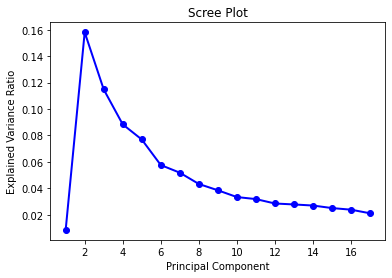

In [ ]:
# Calculate the explained variance ratio
explained_variance_ratio = svd.explained_variance_ratio_

# Create a scree plot
plt.plot(range(1, len(explained_variance_ratio)+1), explained_variance_ratio, 'bo-', linewidth=2)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

In [ ]:
# Define the number of components to use
n_components = 2

# Instantiate a TruncatedSVD object with the chosen number of components
tsvd = TruncatedSVD(n_components=n_components)

# Fit the TruncatedSVD on the data
principal_components = tsvd.fit_transform(construction_data)

# Create a new DataFrame with the principal components as columns
principal_df = pd.DataFrame(principal_components, columns=[f'PC{i}' for i in range(1, n_components+1)])

# Add the original target column to the new DataFrame
target_col = 'YTD Accident Cost'
principal_df[target_col] = target_variable.values

# Inspect the resulting DataFrame
print(principal_df.head())

        PC1       PC2  YTD Accident Cost
0  2.639636 -0.473332             210.50
1  2.683678 -1.365289             977.97
2  3.155095 -1.190958             848.97
3  2.933564 -1.492183             312.37
4  2.494029  1.453769           18052.16


# **Exploratory Data Analysis**

In [ ]:
# Create a list of all numerical columns
num_cols = injury_data.select_dtypes(include=["float"]).columns.tolist()
# Create a list of all categorical columns
cat_cols = injury_data.select_dtypes(include=["object", "category"]).columns.tolist()

## **Univariate Analysis**

### **Univariate Analysis for Numerical Variables**

In [ ]:
# Check summary statistics
injury_data[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Accident Age,33391.0,39.787697,13.268799,14.00,29.00,38.0,51.000,87.00
Occupational Experience in Years,33391.0,2.088212,4.662853,0.50,0.50,0.5,1.000,66.00
YTD Accident Cost,33391.0,13027.988431,44441.113334,-602332.29,457.25,2078.5,10846.515,1402223.81
YTD Number of Days Lost,33391.0,49.738768,82.232264,0.00,1.00,9.0,57.000,527.00


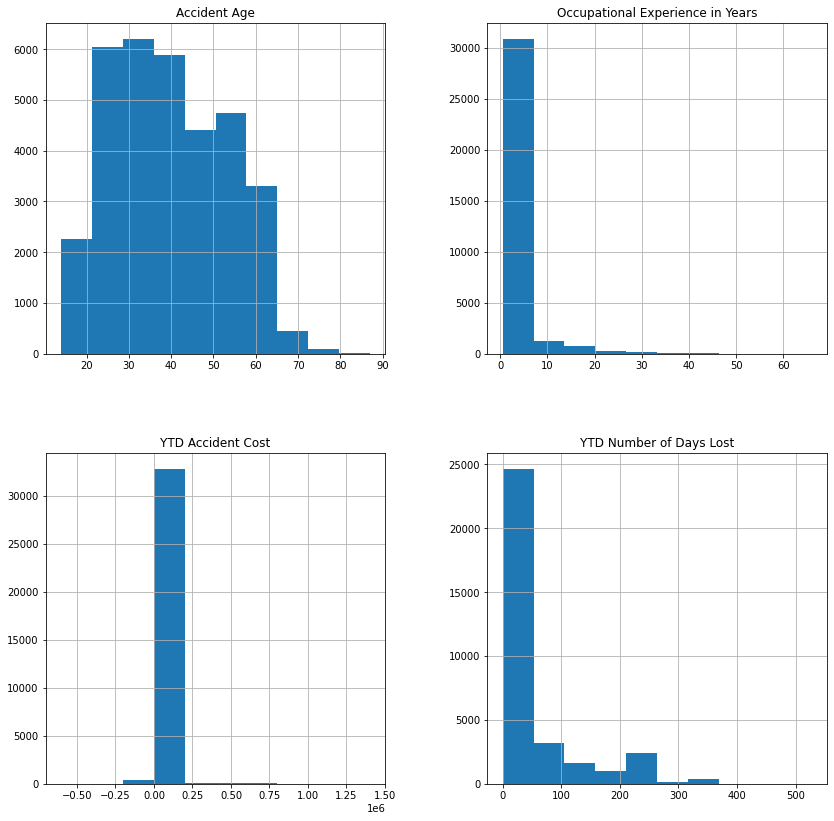

In [ ]:
# Plot histograms
injury_data[num_cols].hist(figsize = (14, 14))
plt.show()

### **Univariate Analysis for Categorical Variables**

In [ ]:
# See the percentage of sub categories of each category
for i in cat_cols:
  print(injury_data[i].value_counts(normalize = True))
  print('*'*40)

Y    0.917463
N    0.082537
Name: Small Business Indicator, dtype: float64
****************************************
LESS THAN 20        0.482705
20 TO 100           0.285736
GREATER THAN 100    0.231559
Name: Full Time Worker Band, dtype: float64
****************************************
LOST TIME       0.977539
NO LOST TIME    0.022461
Name: Claim Type Description, dtype: float64
****************************************
N    0.992004
Y    0.007996
Name: Fatality Indicator, dtype: float64
****************************************
M    0.963254
F    0.036746
Name: Gender Code, dtype: float64
****************************************
N    0.899793
Y    0.100207
Name: Critical Injury Indicator, dtype: float64
****************************************
4    0.284328
3    0.281723
2    0.221527
1    0.212423
Name: Accident Quarter, dtype: float64
****************************************
Outside of GTA    0.6476
GTA               0.3524
Name: Municipality, dtype: float64
*************************

## **Bivariate Analysis**

### **Bivariate Analysis for Numerical Variables**

In [ ]:
# Check the mean of numerical variables grouped by fatality indicator
injury_data.groupby(['Fatality Indicator'])[num_cols].mean()

,Accident Age,Occupational Experience in Years,YTD Accident Cost,YTD Number of Days Lost
Fatality Indicator,,,,
N,39.689651,2.070221,11294.654235,50.116176
Y,51.951311,4.320225,228065.298951,2.917603


<AxesSubplot:>

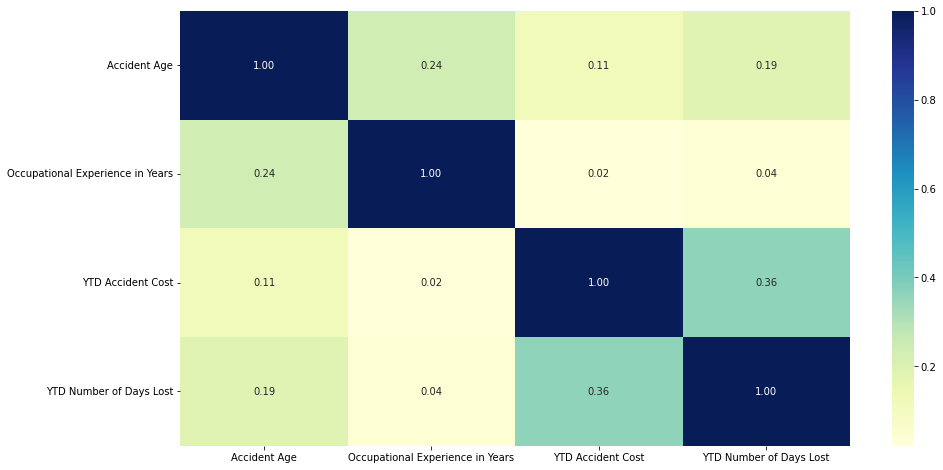

In [ ]:
# Plot the correlation between numerical variables
plt.figure(figsize=(15,8))
sns.heatmap(injury_data[num_cols].corr(), annot=True, fmt='0.2f', cmap='YlGnBu')

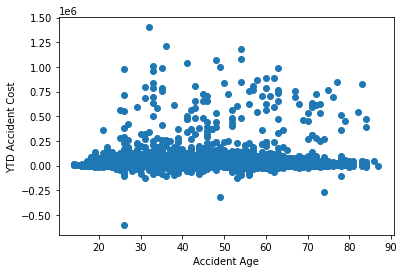

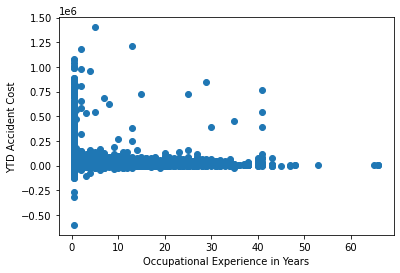

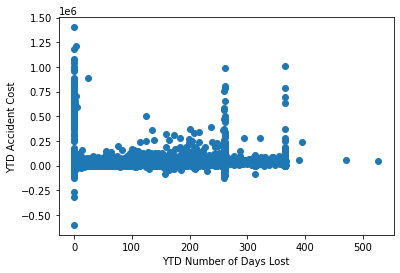

In [ ]:
# Plot scatter plot to check linear relationship between variables
# Select continuous variables from the dataset
num_cols = ['Accident Age', 'Occupational Experience in Years', 'YTD Number of Days Lost']

# Create scatter plots between 'YTD Accident Cost' and the continuous variables
for col in num_cols:
    plt.scatter(injury_data[col], injury_data['YTD Accident Cost'])
    plt.xlabel(col)
    plt.ylabel('YTD Accident Cost')
    plt.show()

### **Bivariate Analysis for Categorical Variables**

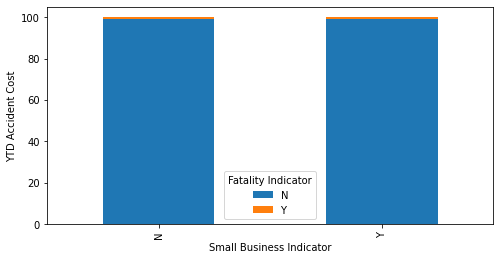

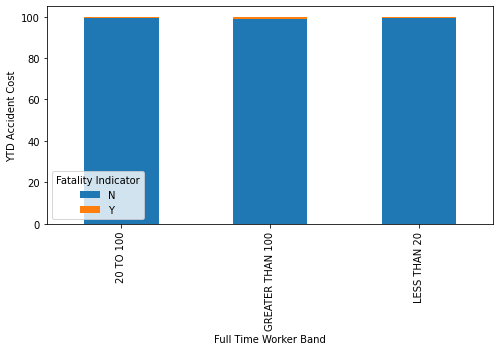

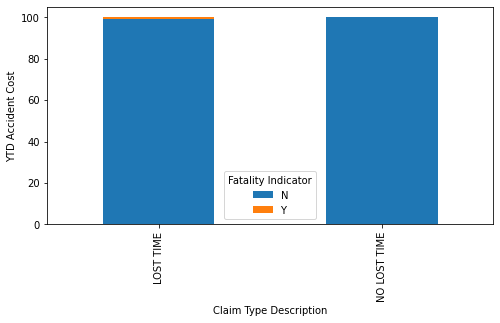

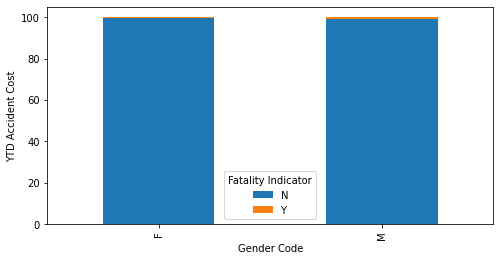

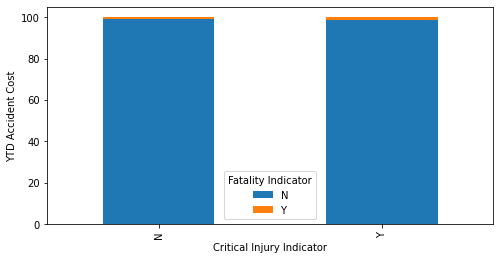

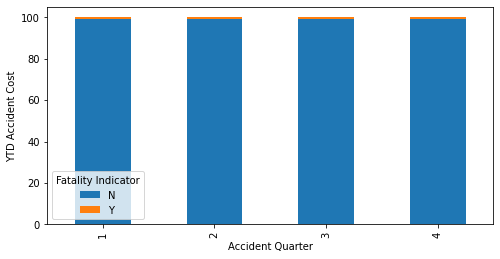

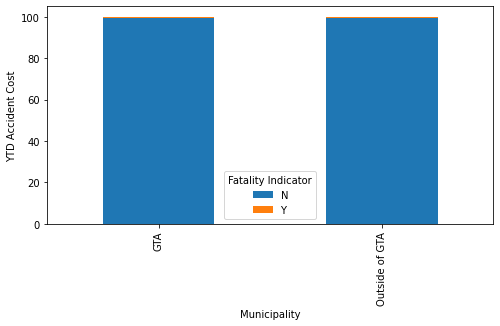

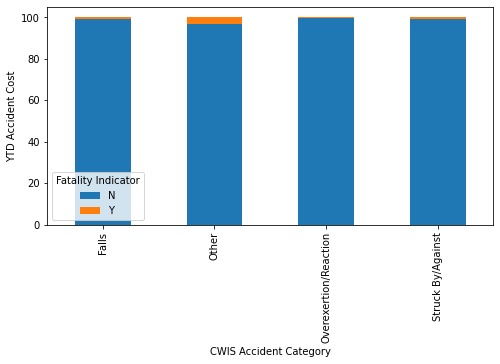

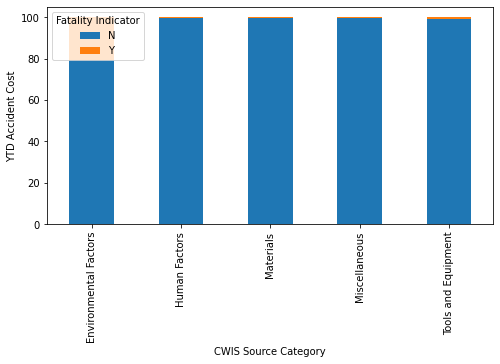

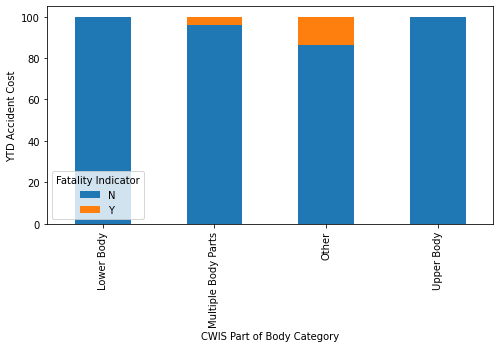

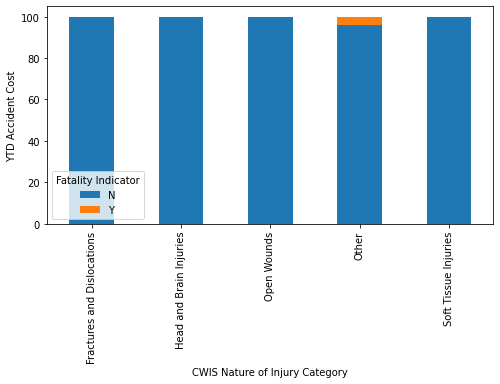

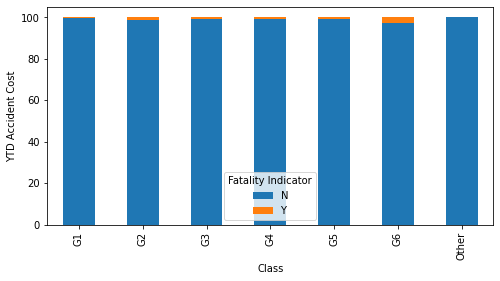

In [ ]:
# Plot bar graphs to see if the YTD Accident Cost is related to other variables
for i in cat_cols:
  if i != 'Fatality Indicator':
    (pd.crosstab(injury_data[i], injury_data['Fatality Indicator'], normalize = 'index')*100).plot(kind = 'bar', figsize = (8,4), stacked = True)
    plt.ylabel('YTD Accident Cost')

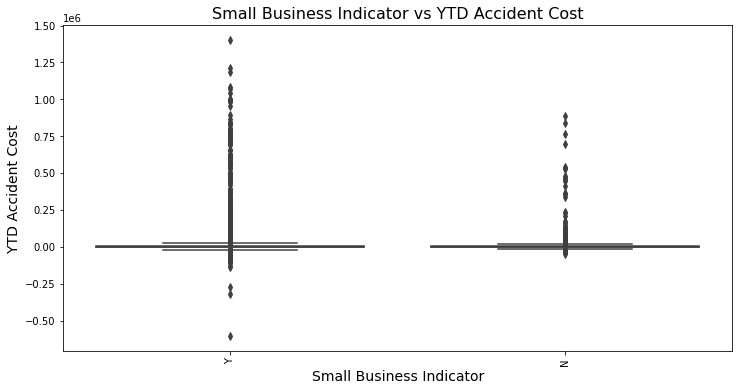

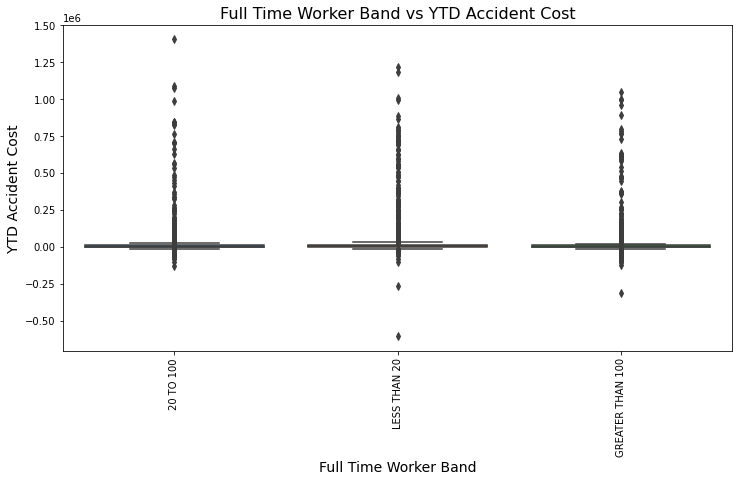

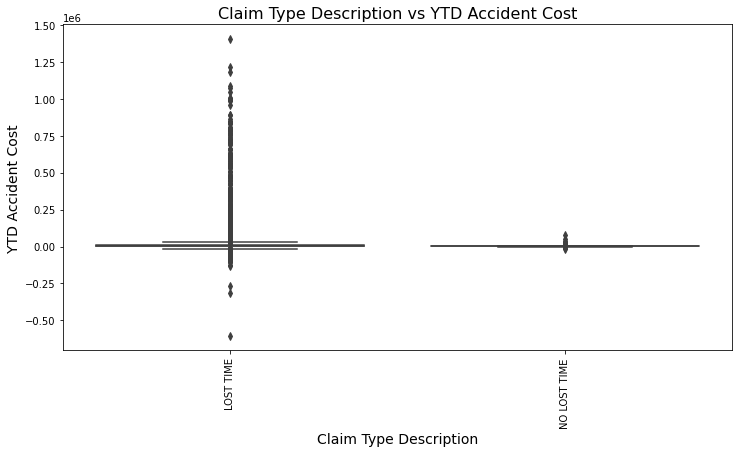

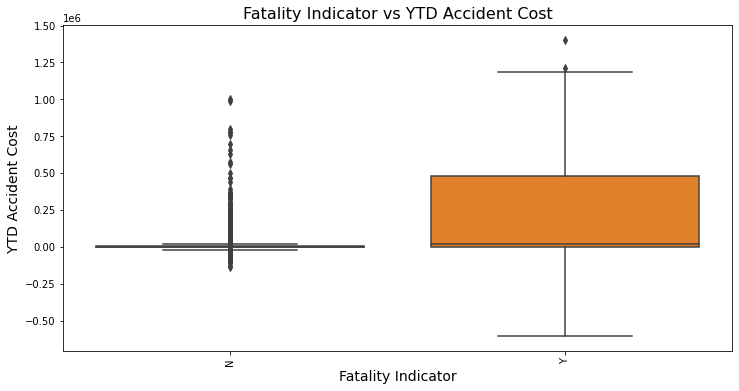

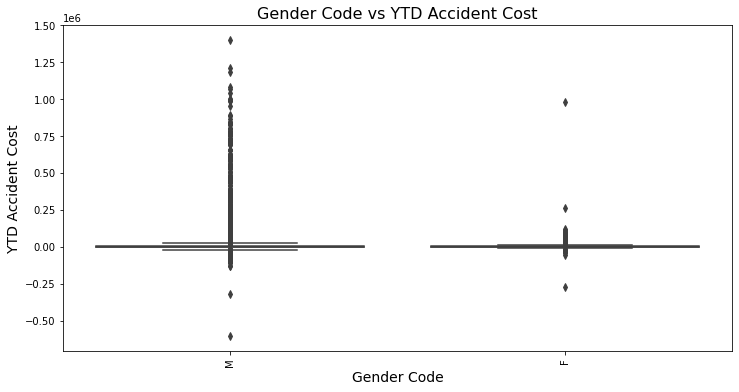

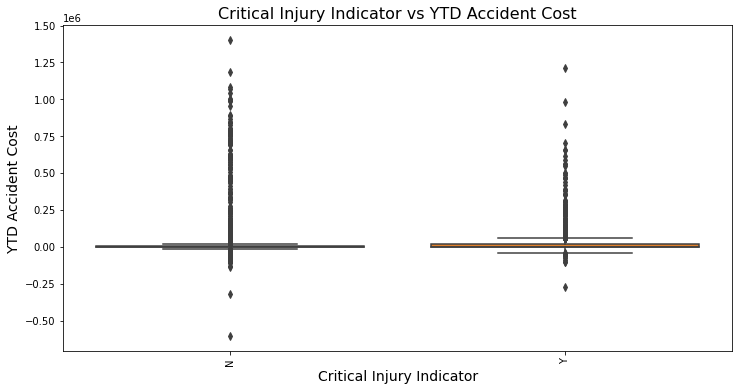

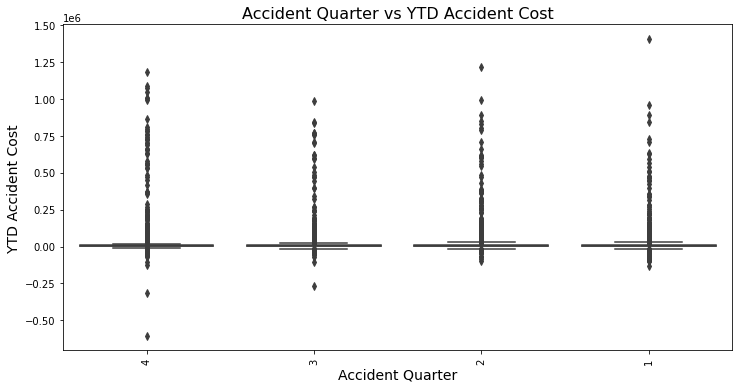

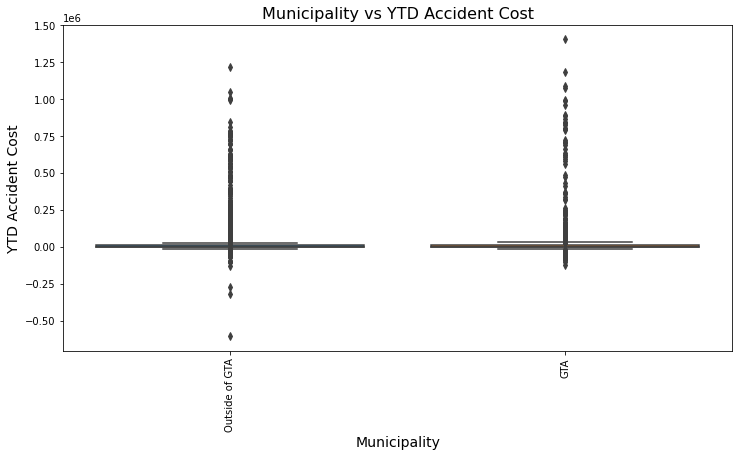

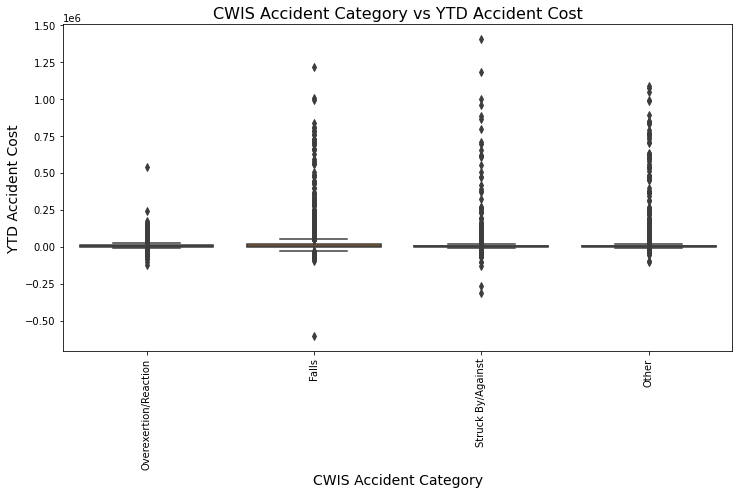

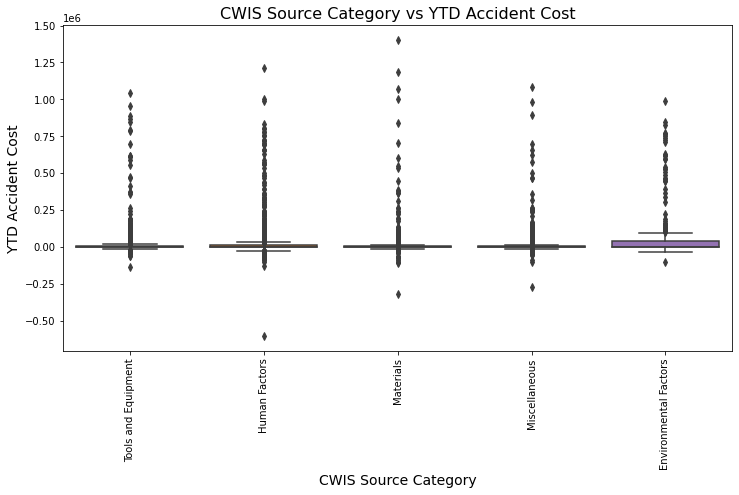

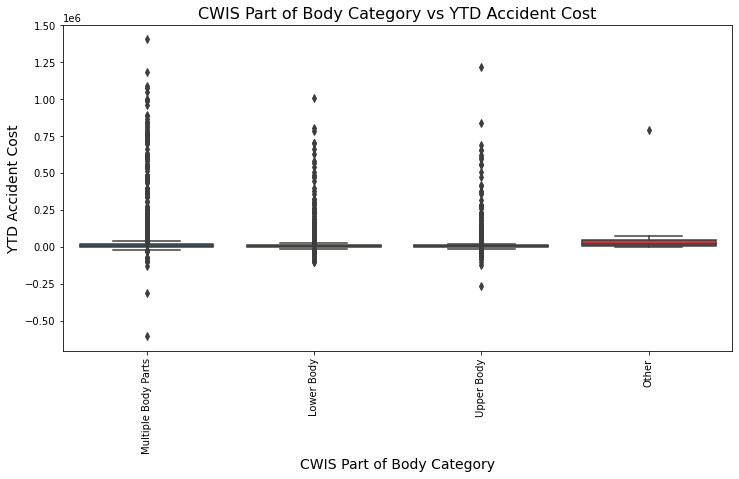

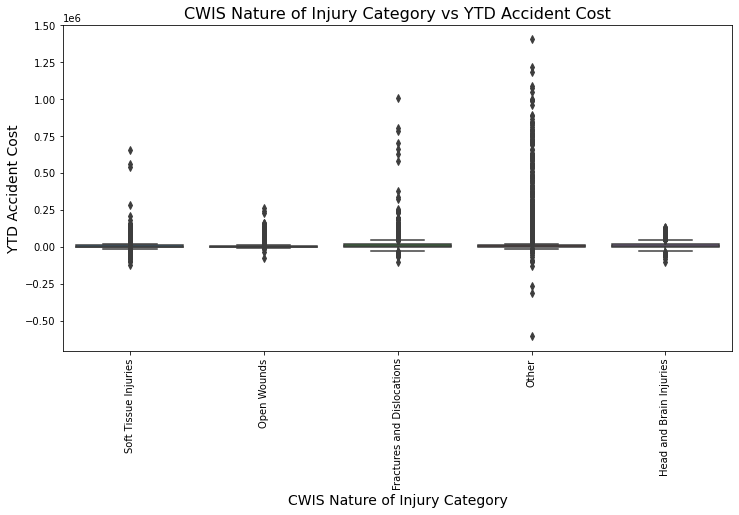

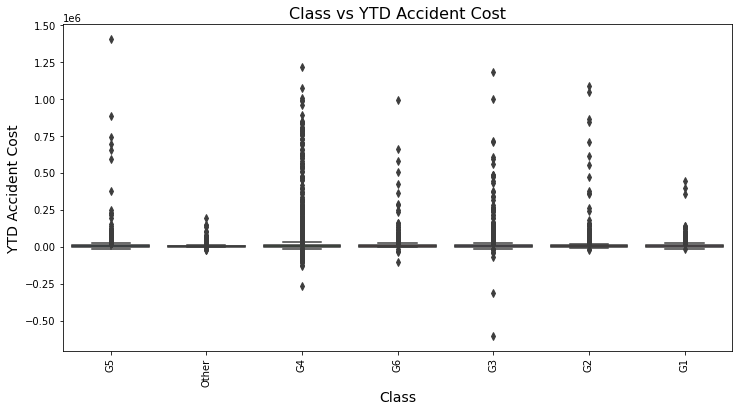

In [ ]:
# Create boxplots for each categorical variable to check linear relationship between variables
for col in cat_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y='YTD Accident Cost', data=injury_data)
    plt.title(f'{col} vs YTD Accident Cost', fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel('YTD Accident Cost', fontsize=14)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
# Calculate correlation coefficient between target variable and each categorical variable
corrs = []
for col in cat_cols:
    if injury_data[col].dtype == 'object':
        cont_table = pd.crosstab(injury_data[col], injury_data['YTD Accident Cost'])
        if cont_table.shape[0] == 2:
            corr, _ = stats.pointbiserialr(injury_data[col].astype('category').cat.codes, injury_data['YTD Accident Cost'])
        else:
            corr, _ = stats.chi2_contingency(cont_table)[0:2]
        corrs.append([col, corr])
        
# Print the correlation coefficients
for col, corr in corrs:
    print(f"Correlation between {col} and YTD Accident Cost: {corr:.4f}")

Correlation between Small Business Indicator and YTD Accident Cost: 0.0014
Correlation between Full Time Worker Band and YTD Accident Cost: 56016.9500
Correlation between Claim Type Description and YTD Accident Cost: -0.0391
Correlation between Fatality Indicator and YTD Accident Cost: 0.4344
Correlation between Gender Code and YTD Accident Cost: 0.0172
Correlation between Critical Injury Indicator and YTD Accident Cost: 0.0779
Correlation between Accident Quarter and YTD Accident Cost: 86326.8122
Correlation between Municipality and YTD Accident Cost: -0.0187
Correlation between CWIS Accident Category and YTD Accident Cost: 84669.9814
Correlation between CWIS Source Category and YTD Accident Cost: 110837.0167
Correlation between CWIS Part of Body Category and YTD Accident Cost: 84829.1637
Correlation between CWIS Nature of Injury Category and YTD Accident Cost: 114095.7667
Correlation between Class and YTD Accident Cost: 169071.5885


# **Model Building**

## **Data Preparation**

In [ ]:
# See data info
injury_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33391 entries, 4 to 145760
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Small Business Indicator          33391 non-null  object 
 1   Full Time Worker Band             33391 non-null  object 
 2   Claim Type Description            33391 non-null  object 
 3   Fatality Indicator                33391 non-null  object 
 4   Gender Code                       33391 non-null  object 
 5   Accident Age                      33391 non-null  float64
 6   Occupational Experience in Years  33391 non-null  float64
 7   Critical Injury Indicator         33391 non-null  object 
 8   Accident Quarter                  33391 non-null  object 
 9   YTD Accident Cost                 33391 non-null  float64
 10  YTD Number of Days Lost           33391 non-null  float64
 11  Municipality                      33391 non-null  object 
 12  CWI

In [ ]:
# Create dummy variables for categorical variables
injury_data = pd.get_dummies(
    injury_data,
    columns = injury_data.select_dtypes(include = ["object", "category"]).columns.tolist(),
    drop_first = False,
)

In [ ]:
# See data info
injury_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33391 entries, 4 to 145760
Data columns (total 48 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Accident Age                                               33391 non-null  float64
 1   Occupational Experience in Years                           33391 non-null  float64
 2   YTD Accident Cost                                          33391 non-null  float64
 3   YTD Number of Days Lost                                    33391 non-null  float64
 4   Small Business Indicator_N                                 33391 non-null  uint8  
 5   Small Business Indicator_Y                                 33391 non-null  uint8  
 6   Full Time Worker Band_20 TO 100                            33391 non-null  uint8  
 7   Full Time Worker Band_GREATER THAN 100                     33391 non-null  uint8  
 8   Full 

In [ ]:
# Create a new dataframe that only has features from PC1 and PC2
# Create a list containing all the features from PC1 and PC2
model_columns = ['Fatality Indicator_N', 'Claim Type Description_LOST TIME', 'Gender Code_M', 'Small Business Indicator_Y', 
                 'Critical Injury Indicator_N', 'Accident Age', 'Occupational Experience in Years', 'YTD Number of Days Lost', 
                 'CWIS Source Category_Human Factors', 'CWIS Accident Category_Struck By/Against', 'YTD Accident Cost']

# Create a subset of the data with only the construction-related columns
model_data = injury_data.loc[:, model_columns]

In [ ]:
# See data info
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33391 entries, 4 to 145760
Data columns (total 11 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Fatality Indicator_N                      33391 non-null  uint8  
 1   Claim Type Description_LOST TIME          33391 non-null  uint8  
 2   Gender Code_M                             33391 non-null  uint8  
 3   Small Business Indicator_Y                33391 non-null  uint8  
 4   Critical Injury Indicator_N               33391 non-null  uint8  
 5   Accident Age                              33391 non-null  float64
 6   Occupational Experience in Years          33391 non-null  float64
 7   YTD Number of Days Lost                   33391 non-null  float64
 8   CWIS Source Category_Human Factors        33391 non-null  uint8  
 9   CWIS Accident Category_Struck By/Against  33391 non-null  uint8  
 10  YTD Accident Cost                

In [ ]:
# Separate independent variables from dependent variable
x = model_data.drop('YTD Accident Cost', axis = 1)
y = model_data['YTD Accident Cost']

In [ ]:
# Split the dataset into train and test datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True, random_state = 1)

In [ ]:
# Check the shape of the train and test datasets
print("Shape of the train dataset: ", x_train.shape)
print("Shape of the test dataset: ", x_test.shape)

Shape of the train dataset:  (23373, 10)
Shape of the test dataset:  (10018, 10)


## **Model Building**

### **Metrics**

In [ ]:
# Create functions to compute metrics for model evaluation
# Adjust R-squared
def adj_r2_score(predictors, targets, predictions):
  r2 = r2_score(targets, predictions)
  n = predictors.shape[0]
  k = predictors.shape[1]
  return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# MAPE
def mape_score(targets, predictions):
  return np.mean(np.abs(targets - predictions) / targets) * 100

# Different metrics for the model
def model_performance_regression(model, predictors, target):
  pred = model.predict(predictors)

  r2 = r2_score(target, pred) #R-squared
  adjr2 = adj_r2_score(predictors, target, pred) #Adjusted R-squared
  rmse = np.sqrt(mean_squared_error(target, pred)) #RMSE
  mae = mean_absolute_error(target, pred) #MAE
  mape = mape_score(target, pred) #MAPE

# Create dataframe of metrics
  df_perf = pd.DataFrame(
      {
          "RMSE": rmse,
          "MAE": mae,
          "R-squared": r2,
          "Adj. R-squared": adjr2,
          "MAPE": mape,
      },
      index = [0],
  )

  return df_perf

In [ ]:
# RMSE
def rmse(predictions, targets):
  return np.sqrt(((targets - predictions) ** 2).mean())

# MAPE
def mape(predictions, targets):
  return np.mean(np.abs((targets - predictions)) / targets) * 100

# MAE
def mae(predictions, targets):
  return np.mean(np.abs((targets - predictions)))

# Model performance on test and train datasets
def model_perf(olsmodel, x_train, x_test, y_train, y_test):
  y_pred_train = olsmodel.predict(x_train)
  y_observed_train = y_train
  y_pred_test = olsmodel.predict(x_test)
  y_observed_test = y_test

  print(
      pd.DataFrame(
          {
              "Data": ["Train", "Test"],
              "RMSE": [
                  rmse(y_pred_train, y_observed_train),
                  rmse(y_pred_test, y_observed_test)
              ],
              "MAE": [
                  mae(y_pred_train, y_observed_train),
                  mae(y_pred_test, y_observed_test)
              ],
              "MAPE": [
                  mape(y_pred_train, y_observed_train),
                  mape(y_pred_test, y_observed_test)
              ],
          }
      )
  )

### **Linear Regression**

In [ ]:
# Add constant
import statsmodels.api as sm

x_train1 = sm.add_constant(x_train)
x_test1 = sm.add_constant(x_test)

olsmodel1 = sm.OLS(y_train, x_train1).fit()

olsmodel1.summary()
print(olsmodel1.summary())

In [ ]:
# See the performance of the model
lin_reg_test = model_performance_regression(olsmodel1, x_test1, y_test)
lin_reg_test

In [ ]:
# See the performance of the model on train and test dataset
model_perf(olsmodel1, x_train1, x_test1, y_train, y_test)

In [ ]:
# Check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(train):
  vif = pd.DataFrame()
  vif["feature"] = train.columns

  vif["VIF"] = [
      variance_inflation_factor(train.values, i) for i in range(len(train.columns))
  ]
  return vif

# See result
checking_vif(x_train1)

In [ ]:
# Build model
olsmodel1 = sm.OLS(y_train, x_train1).fit()

# Get model summary
olsmodel1.summary()

In [ ]:
# Check VIF to rebuild model
x_train2 = x_train1.drop(['Claim Type Description_LOST TIME', 'Gender Code_M', 'Accident Age', 'CWIS Source Category_Human Factors', 'CWIS Accident Category_Struck By/Against'], axis=1)

checking_vif(x_train2)

In [ ]:
# Rebuild model by dropping variables
x_train2 = x_train1.drop(['Claim Type Description_LOST TIME', 'Gender Code_M', 'Accident Age', 'CWIS Source Category_Human Factors', 'CWIS Accident Category_Struck By/Against'], axis=1)
x_test2 = x_test1.drop(['Claim Type Description_LOST TIME', 'Gender Code_M', 'Accident Age', 'CWIS Source Category_Human Factors', 'CWIS Accident Category_Struck By/Against'], axis=1)

# Build model
olsmodel2 = sm.OLS(y_train, x_train2).fit()

# Get model summary
olsmodel2.summary()

In [ ]:
# Check performance
lin_reg_test = model_performance_regression(olsmodel2, x_test2, y_test)
lin_reg_test

In [ ]:
# Check model performance on train and test data
model_perf(olsmodel2, x_train2, x_test2, y_train, y_test)

### **Decision Tree Regressor**

In [ ]:
# Build model using decision tree regressor algorithm
dt_regressor = DecisionTreeRegressor(random_state = 1)

# Fitting the model
dt_regressor.fit(x_train, y_train)

# Model performance
dt_regressor_perf_test = model_performance_regression(dt_regressor, x_test, y_test)

# See performanc of the model
dt_regressor_perf_test

### **Random Forest Regressor**

In [ ]:
# Build model using random forest regressor algorithm
regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)

# Fitting the model
regressor.fit(x_train, y_train)

# Model performance
regressor_perf_test = model_performance_regression(regressor, x_test, y_test)

# See performanc of the model
regressor_perf_test

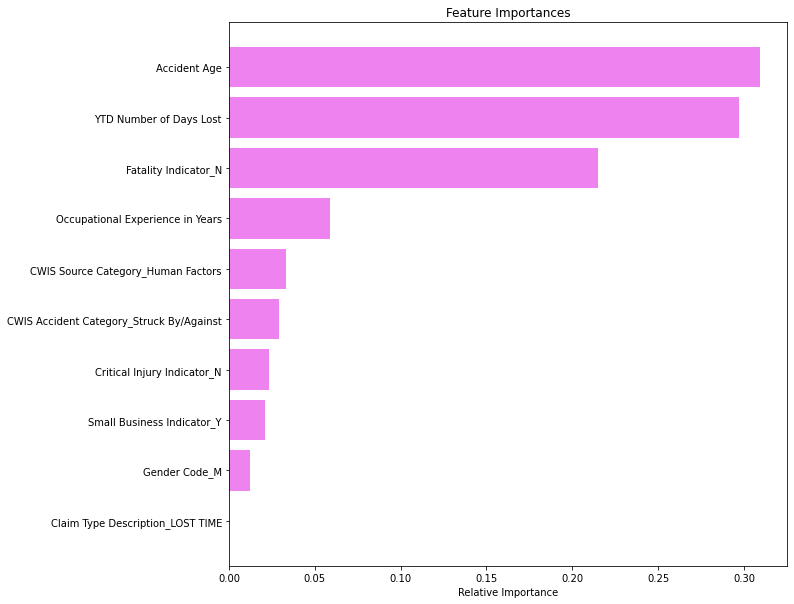

In [ ]:
from numpy.core.numeric import indices

# Plot the feature importance
features = list(x.columns)
importances = regressor.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()